In [132]:
!pip install category_encoders

In [133]:
# Importa a biblioteca pandas, usada para manipulação e análise de dados.
import pandas as pd

# Importa a biblioteca numpy, usada para manipulação de arrays e operações numéricas.
import numpy as np

# Importa a biblioteca pyplot do matplotlib, usada para criar gráficos.
from matplotlib import pyplot as plt

# Importa a biblioteca seaborn, que é uma extensão do matplotlib para criar gráficos mais atraentes e informativos.
import seaborn as sns

# Importando a biblioteca math para funções matemáticas.
import math

# Importa a função train_test_split para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

# Importa a biblioteca preprocessing para utilizar o MinMaxScaler e StandardScaler, usados para normalização e padronização de dados.
from sklearn.preprocessing import StandardScaler

# Importa o category_encoders, que fornece várias técnicas para codificação de variáveis categóricas.
import category_encoders as ce

# Importa a biblioteca Pipeline para construir fluxos de trabalho de machine learning com pré-processamento e modelos.
from sklearn.pipeline import Pipeline

# Importa a classe LogisticRegression para aplicar a regressão logística.
from sklearn.linear_model import LogisticRegression

# Importa a classe RandomForestClassifier para aplicar a classificação usando Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importa a classe DecisionTreeClassifier para aplicar a classificação usando árvore de decisão.
from sklearn.tree import DecisionTreeClassifier

# Importa as métricas roc_auc_score, confusion_matrix e classification_report para avaliar o desempenho do modelo.
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


# Importa o GridSearchCV para realizar a busca em grade de hiperparâmetros para o modelo.
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importa a biblioteca _pickle para serialização e desserialização de objetos.
import _pickle as cPickle

# Importa joblib, usado para salvar e carregar modelos de forma eficiente.
import joblib

# Importa a biblioteca de warnings para controlar a exibição de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apareçam no terminal durante a execução do código.
warnings.filterwarnings("ignore")

# Configurações do pandas para melhor visualização dos dados:

# Exibe todo o conteúdo da célula, sem truncamento.
pd.set_option('display.max_colwidth', None)

# Evita que quebre a linha automaticamente ao exibir dataframes grandes.
pd.set_option('display.expand_frame_repr', False)

# Aumenta a largura do display para acomodar mais informações.
pd.set_option('display.width', 300)


In [134]:
import pandas as pd

# Dicionário com informações das variáveis
dictionary = {
    "fraud_bool": ("Indicador de fraude na solicitação de abertura de conta.", "0: Legítima, 1: Fraudulenta"),
    "income": ("Renda declarada do cliente.", "Valor numérico representando a renda."),
    "name_email_similarity": ("Similaridade entre o nome e o e-mail fornecido.", "Valor entre 0 e 1."),
    "prev_address_months_count": ("Número de meses no endereço anterior.", "Valor numérico."),
    "current_address_months_count": ("Número de meses no endereço atual.", "Valor numérico."),
    "customer_age": ("Idade do cliente.", "Valor numérico."),
    "days_since_request": ("Dias desde a solicitação de abertura de conta.", "Valor numérico."),
    "payment_type": ("Tipo de método de pagamento utilizado.", "Exemplos: AA, AB, etc."),
    "zip_count_4w": ("Número de vezes que o CEP foi usado nas últimas 4 semanas.", "Valor numérico."),
    "velocity_6h": ("Velocidade de transações em uma janela de 6 horas.", "Valor numérico."),
    "velocity_24h": ("Velocidade de transações em uma janela de 24 horas.", "Valor numérico."),
    "velocity_4w": ("Velocidade de transações em uma janela de 4 semanas.", "Valor numérico."),
    "bank_branch_count_8w": ("Número de agências bancárias utilizadas nas últimas 8 semanas.", "Valor numérico."),
    "date_of_birth_distinct_emails_4w": ("Número de e-mails distintos usados com a mesma data de nascimento nas últimas 4 semanas.", "Valor numérico."),
    "credit_risk_score": ("Pontuação de risco de crédito atribuída ao cliente.", "Valor numérico."),
    "email_is_free": ("Se o domínio de e-mail é gratuito.", "0: Não, 1: Sim"),
    "housing_status": ("Situação de moradia do cliente.", "Exemplos: Own, Rent, etc."),
    "job_title": ("Cargo profissional do cliente.", "Exemplos: Engineer, Teacher, etc."),
    "length_of_residence": ("Tempo total de residência no endereço atual.", "Valor numérico."),
    "proposed_credit_limit": ("Limite de crédito proposto na solicitação.", "Valor numérico."),
    "foreign_request": ("Se a solicitação foi feita fora do país de origem.", "0: Não, 1: Sim"),
    "source": ("Origem da solicitação.", "Exemplos: INTERNET, PHONE, etc."),
    "session_length_in_minutes": ("Duração da sessão de solicitação em minutos.", "Valor numérico."),
    "device_os": ("Sistema operacional do dispositivo usado.", "Exemplos: Windows, iOS, etc."),
    "keep_alive_session": ("Se a sessão foi mantida ativa.", "0: Não, 1: Sim"),
    "device_distinct_emails_8w": ("Número de e-mails distintos usados no mesmo dispositivo nas últimas 8 semanas.", "Valor numérico."),
    "device_fraud_count": ("Número de fraudes associadas ao dispositivo.", "Valor numérico."),
    "month": ("Número do mês da solicitação.", "1 a 12."),
    "month_named": ("Nome do mês da solicitação.", "Exemplos: January, February, etc.")
}

# Criar DataFrame a partir do dicionário
dict_df = pd.DataFrame(dictionary.items(), columns=["Variável", "Info"])

# Separar as colunas de descrição e categorias
dict_df["Descrição"] = dict_df["Info"].apply(lambda x: x[0])
dict_df["Categorias"] = dict_df["Info"].apply(lambda x: x[1])

# Definir tipo de variável
dict_df["Tipo"] = dict_df["Variável"].apply(
    lambda x: "Numérica" if x in [
        "income", "name_email_similarity", "prev_address_months_count", "current_address_months_count",
        "customer_age", "days_since_request", "zip_count_4w", "velocity_6h", "velocity_24h", "velocity_4w",
        "bank_branch_count_8w", "date_of_birth_distinct_emails_4w", "credit_risk_score", "length_of_residence",
        "proposed_credit_limit", "session_length_in_minutes", "device_distinct_emails_8w", "device_fraud_count",
        "month"
    ] else "Categórica"
)

# Remover coluna auxiliar
dict_df.drop(columns=["Info"], inplace=True)

# Exibir o DataFrame
dict_df


,Variável,Descrição,Categorias,Tipo
0,fraud_bool,Indicador de fraude na solicitação de abertura de conta.,"0: Legítima, 1: Fraudulenta",Categórica
1,income,Renda declarada do cliente.,Valor numérico representando a renda.,Numérica
2,name_email_similarity,Similaridade entre o nome e o e-mail fornecido.,Valor entre 0 e 1.,Numérica
3,prev_address_months_count,Número de meses no endereço anterior.,Valor numérico.,Numérica
4,current_address_months_count,Número de meses no endereço atual.,Valor numérico.,Numérica
5,customer_age,Idade do cliente.,Valor numérico.,Numérica
6,days_since_request,Dias desde a solicitação de abertura de conta.,Valor numérico.,Numérica
7,payment_type,Tipo de método de pagamento utilizado.,"Exemplos: AA, AB, etc.",Categórica
8,zip_count_4w,Número de vezes que o CEP foi usado nas últimas 4 semanas.,Valor numérico.,Numérica
9,velocity_6h,Velocidade de transações em uma janela de 6 horas.,Valor numérico.,Numérica


In [135]:
from google.colab import drive
import pandas as pd

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para o arquivo
data_url = '/content/drive/My Drive/Base (1).csv'

# Carregar o dataset (com cabeçalho automático)
df = pd.read_csv(data_url, sep=',', encoding='utf-8')

# Substituir o nome das colunas após carregar o dataframe
df.columns = [
 'fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'payment_type',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'credit_risk_score',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'source',
 'session_length_in_minutes',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month',
 'month_named'
]



# Mostrar as primeiras linhas para conferir
df.head(3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,month_named
0,0,0.3,0.986506,NaN,25.0,40,0.006735,AA,1059,13096.035018,...,1500.0,0,INTERNET,16.224843,linux,1,1.0,0,0,Janeiro
1,0,0.8,0.617426,NaN,89.0,20,0.010095,AD,1658,9223.283431,...,1500.0,0,INTERNET,3.363854,other,1,1.0,0,0,Janeiro
2,0,0.8,0.996707,9.0,14.0,40,0.012316,AB,1095,4471.472149,...,200.0,0,INTERNET,22.730559,windows,0,1.0,0,0,Janeiro


In [136]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 1000000
Número de atributos do dataset: 32


In [137]:
# verifica linhas duplicadas

df.duplicated().sum()

np.int64(0)

In [138]:
# target diretamente com base na variável fraud_bool
df['target'] = df['fraud_bool'].astype(int)

# Separar X e y
y = df['target']  # variável resposta
X = df.drop('target', axis=1)  # variáveis explicativas

# Verificar formatos
X.shape, y.shape


((1000000, 32), (1000000,))

In [139]:
from sklearn.model_selection import train_test_split

# Separar treino e teste mantendo a proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 30% para teste
    random_state=42,     # reprodutibilidade
    stratify=y           # mantém proporção de classes
)

# Verificar o balanceamento nas divisões
print("Proporção no conjunto original:")
print(y.value_counts(normalize=True), "\n")

print("Proporção no treino:")
print(y_train.value_counts(normalize=True), "\n")

print("Proporção no teste:")
print(y_test.value_counts(normalize=True))


Proporção no conjunto original:
target
0    0.988971
1    0.011029
Name: proportion, dtype: float64 

Proporção no treino:
target
0    0.988971
1    0.011029
Name: proportion, dtype: float64 

Proporção no teste:
target
0    0.98897
1    0.01103
Name: proportion, dtype: float64


In [140]:
df_treino = pd.concat([X_train,y_train], axis = 1)

In [141]:
df_treino.shape

(700000, 33)

In [142]:
df_treino.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,month_named,target
533494,0,0.1,0.242896,NaN,189.0,40,0.010444,AB,1301,3858.313920,...,0,INTERNET,6.863800,other,0,1.0,0,3,Abril,0
172378,0,0.1,0.996538,NaN,251.0,20,0.020638,AD,3785,3732.013701,...,0,INTERNET,7.942521,macintosh,0,1.0,0,1,Fevereiro,0


In [143]:
pd.DataFrame.info(df_treino);

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 533494 to 228494
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        700000 non-null  int64  
 1   income                            700000 non-null  float64
 2   name_email_similarity             700000 non-null  float64
 3   prev_address_months_count         200993 non-null  float64
 4   current_address_months_count      697025 non-null  float64
 5   customer_age                      700000 non-null  int64  
 6   days_since_request                700000 non-null  float64
 7   payment_type                      700000 non-null  object 
 8   zip_count_4w                      700000 non-null  int64  
 9   velocity_6h                       700000 non-null  float64
 10  velocity_24h                      700000 non-null  float64
 11  velocity_4w                       700000 non-null  f

In [144]:
# separando em listas: variáveis numéricas e categóricas
num_vars = df_treino.select_dtypes(include=['number']).columns.tolist()  # Seleciona colunas numéricas
num_vars = [col for col in num_vars if col != 'target']  # Remove a variável target

cat_vars = df_treino.select_dtypes(exclude=['number']).columns.tolist()  # Colunas categóricas

# Exibindo os resultados
print("Variáveis Numéricas:", num_vars)
print("Variáveis Categóricas:", cat_vars)
print("Qtd Variáveis Numéricas:", len(num_vars))
print("Qtd Variáveis Categóricas:", len(cat_vars))
print("Tipo da Variável Resposta:", df_treino['target'].dtypes)


Variáveis Numéricas: ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']
Variáveis Categóricas: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os', 'month_named']
Qtd Variáveis Numéricas: 26
Qtd Variáveis Categóricas: 6
Tipo da Variável Resposta: int64


In [145]:
# Calcular percentual de valores ausentes e zeros para cada variável

# Percentual de valores ausentes (NaN) para cada variável
missing_percent = df_treino.isnull().mean() * 100  # O método isnull() retorna um DataFrame booleano onde True indica valores ausentes. Mean() calcula a média (porcentagem) de valores ausentes.

# Percentual de zeros para cada variável
zeros_percent = (df_treino == 0).mean() * 100  # O código (df == 0) cria um DataFrame booleano, onde True representa zeros. Mean() calcula a porcentagem de zeros.

# Criar um DataFrame para mostrar os resultados de valores ausentes e zeros
missing_zeros_df = pd.DataFrame({
    'features': df_treino.columns,  # Coluna com o nome das variáveis
    'missing': missing_percent,  # Coluna com percentual de valores ausentes
    'zeros': zeros_percent  # Coluna com percentual de zeros
})

# Resetando o índice para garantir que não haja problemas com duplicação de colunas
missing_zeros_df.reset_index(drop=True, inplace=True)

# Ordenar o DataFrame pelas variáveis com maior percentual de valores ausentes
missing_zeros_df = missing_zeros_df.sort_values(by='missing', ascending=False)  # Ordena o DataFrame pela coluna 'missing', de forma decrescente.

# Exibir o DataFrame corrigido com a coluna 'features' com o nome correto
missing_zeros_df = missing_zeros_df[['features', 'missing', 'zeros']]  # Selecionando apenas as colunas desejadas

# Exibir o DataFrame final
missing_zeros_df


,features,missing,zeros
3,prev_address_months_count,71.286714,0.000000
4,current_address_months_count,0.425000,0.963714
25,session_length_in_minutes,0.203286,0.000000
28,device_distinct_emails_8w,0.035429,0.622857
0,fraud_bool,0.000000,98.897143
5,customer_age,0.000000,0.000000
6,days_since_request,0.000000,0.000000
2,name_email_similarity,0.000000,0.000000
1,income,0.000000,0.000000
9,velocity_6h,0.000000,0.000000


In [146]:
df_treino['target'].value_counts()

,count
target,
0,692280
1,7720


In [147]:
df_treino['target'].value_counts(normalize=True)

,proportion
target,
0,0.988971
1,0.011029


In [148]:
df_treino.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,month_named,target
533494,0,0.1,0.242896,NaN,189.0,40,0.010444,AB,1301,3858.313920,...,0,INTERNET,6.863800,other,0,1.0,0,3,Abril,0
172378,0,0.1,0.996538,NaN,251.0,20,0.020638,AD,3785,3732.013701,...,0,INTERNET,7.942521,macintosh,0,1.0,0,1,Fevereiro,0


Text(0.5, 1.0, 'Distribuição da variável resposta')

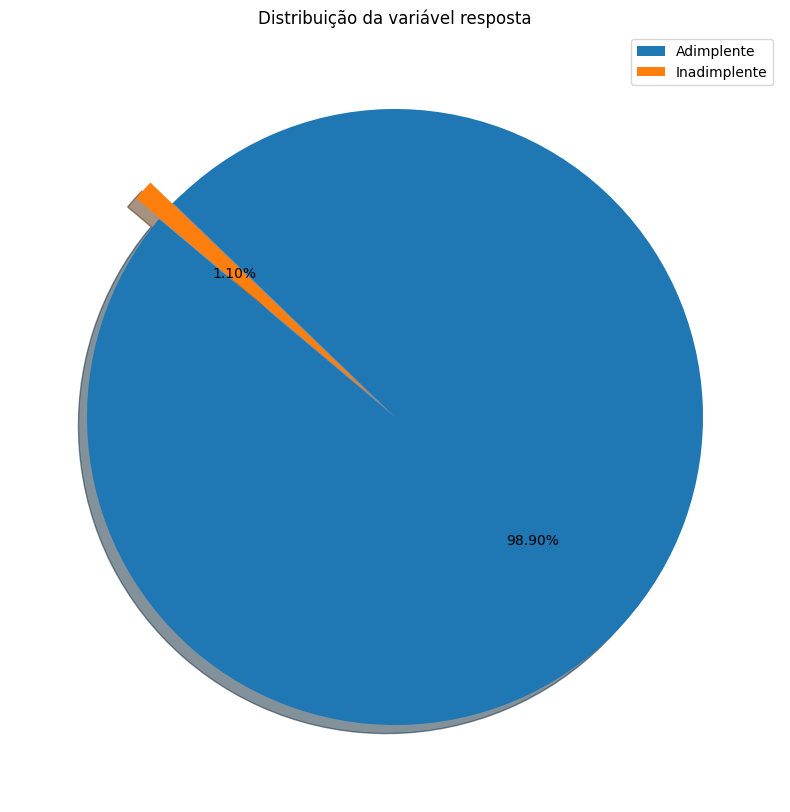

In [149]:
# Define o tamanho da figura do gráfico (10x10 polegadas)
plt.figure(figsize=(10,10))

# O explode destaca a segunda fatia (0.1), enquanto a primeira fatia não é destacada (0).
# Isso pode ser usado para dar mais destaque a uma das categorias.
explode = [0, 0.1]

# Cria o gráfico de pizza (pie chart)
# df['target'].value_counts() conta as ocorrências de cada valor na coluna 'target'
# explode define o destaque das fatias
# autopct='%1.2f%%' exibe as porcentagens das fatias no gráfico com 2 casas decimais
# shadow=True adiciona uma sombra ao gráfico para dar um efeito tridimensional
# startangle=140 define o ângulo de início do gráfico, em graus (140 graus gira o gráfico para que a primeira fatia fique na parte superior)
plt.pie(df_treino['target'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True, startangle=140)

# Adiciona uma legenda ao gráfico com os rótulos para cada categoria (Adimplente e Inadimplente)
plt.legend(labels=['Adimplente', 'Inadimplente'])

# Define o título do gráfico
plt.title('Distribuição da variável resposta')


In [150]:
df_treino[num_vars].describe(percentiles = [0.01,0.75, 0.99])

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,700000.000000,700000.000000,700000.000000,200993.000000,697025.000000,700000.000000,7.000000e+05,700000.000000,700000.000000,700000.000000,...,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,698577.000000,700000.000000,699752.000000,700000.0,700000.000000
mean,0.011029,0.562649,0.493809,60.739175,86.994999,33.695000,1.027806e+00,1572.573460,5661.894626,4769.479613,...,0.889449,10.848057,0.222641,516.048929,0.025263,7.571731,0.577209,1.019151,0.0,3.289077
std,0.104436,0.290484,0.289046,63.553945,88.445867,12.025118,5.395607e+00,1004.729825,3009.771699,1479.758813,...,0.313576,12.121328,0.416020,487.852571,0.156923,8.055398,0.494003,0.176765,0.0,2.208719
min,0.000000,0.100000,0.000001,6.000000,0.000000,10.000000,4.036860e-09,1.000000,-170.603072,1320.283991,...,0.000000,-1.000000,0.000000,190.000000,0.000000,0.000872,0.000000,0.000000,0.0,0.000000
1%,0.000000,0.100000,0.021748,9.000000,1.000000,10.000000,2.789648e-04,247.000000,692.876754,2020.814953,...,0.000000,-1.000000,0.000000,200.000000,0.000000,0.709655,0.000000,1.000000,0.0,0.000000
50%,0.000000,0.600000,0.492320,34.000000,53.000000,30.000000,1.516199e-02,1263.000000,5313.061021,4750.569699,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.122287,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755491,72.000000,130.000000,40.000000,2.632769e-02,1944.000000,7680.131782,5752.346294,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.884242,1.000000,1.000000,0.0,5.000000
99%,1.000000,0.900000,0.997469,320.000000,370.000000,60.000000,2.201318e+01,4967.000000,13930.418801,8599.812314,...,1.000000,31.000000,1.000000,1500.000000,1.000000,44.772588,1.000000,2.000000,0.0,7.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,6700.000000,16715.565404,9506.896596,...,1.000000,32.000000,1.000000,2100.000000,1.000000,83.213536,1.000000,2.000000,0.0,7.000000


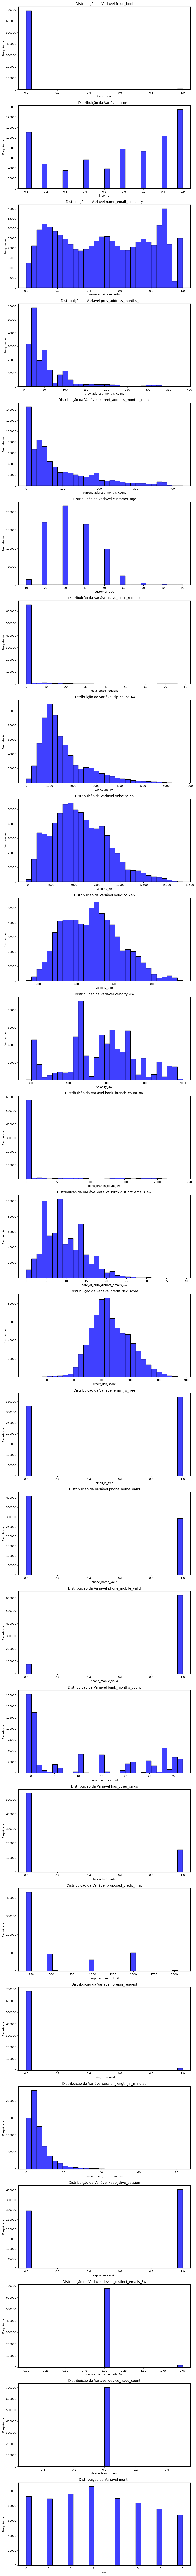

In [151]:
# Criar uma figura com múltiplos histogramas
# Utiliza o método subplots do matplotlib para criar uma figura com múltiplos subgráficos (axes)
# nrows= len(num_vars) cria uma linha de gráficos, uma para cada variável numérica
# ncols=1 define que teremos uma coluna de subgráficos
# figsize=(10, 5 * len(num_vars)) define o tamanho da figura com base no número de variáveis numéricas, aumentando a altura conforme necessário
fig, axes = plt.subplots(nrows=len(num_vars), ncols=1, figsize=(10, 5 * len(num_vars)))

# Criar um histograma para cada variável numérica
# O loop for percorre todas as variáveis numéricas
for i, var in enumerate(num_vars):
    # Utiliza o Seaborn para criar um histograma para cada variável, passando o eixo específico (ax=axes[i])
    # color="blue" define a cor do histograma
    # bins=30 define o número de barras (bins) no histograma
    sns.histplot(df_treino[var], ax=axes[i], color="blue", bins=30)

    # Define o título do gráfico para cada variável
    axes[i].set_title(f'Distribuição da Variável {var}')

    # Define o rótulo no eixo x (nome da variável)
    axes[i].set_xlabel(var)

    # Define o rótulo no eixo y (Frequência)
    axes[i].set_ylabel('Frequência')

# Ajusta o layout dos subgráficos para que fiquem bem organizados e sem sobreposição
plt.tight_layout()

# Exibe os gráficos gerados
plt.show()


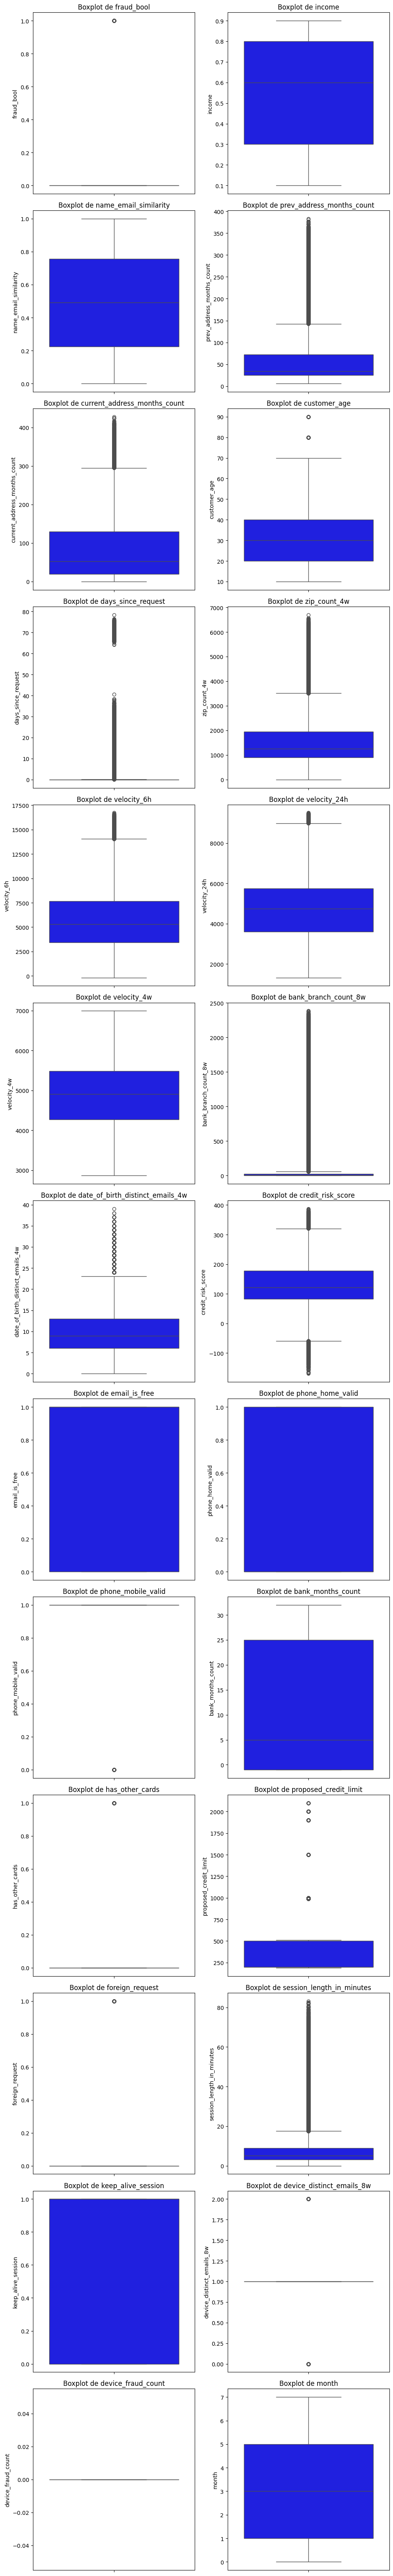

In [152]:
# Calcular o número de linhas necessárias para exibir 2 boxplots por linha
ncols = 2  # número de colunas (2 boxplots por linha)
nrows = math.ceil(len(num_vars) / ncols)  # número de linhas necessárias

# Criar uma figura com múltiplos boxplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))

# Fazer o loop para criar um boxplot para cada variável numérica
for i, var in enumerate(num_vars):
    row = i // ncols  # Calcula a linha onde o boxplot será colocado
    col = i % ncols   # Calcula a coluna onde o boxplot será colocado
    sns.boxplot(y=df_treino[var], ax=axes[row, col], color="blue")  # Cria o boxplot
    axes[row, col].set_title(f'Boxplot de {var}')  # Define o título para cada boxplot
    axes[row, col].set_ylabel(var)  # Define o rótulo do eixo y (nome da variável)

# Ajusta o layout dos gráficos para que fiquem bem organizados
plt.tight_layout()

# Exibe os gráficos gerados
plt.show()


Text(0.5, 1.0, 'Correlação entre os atributos')

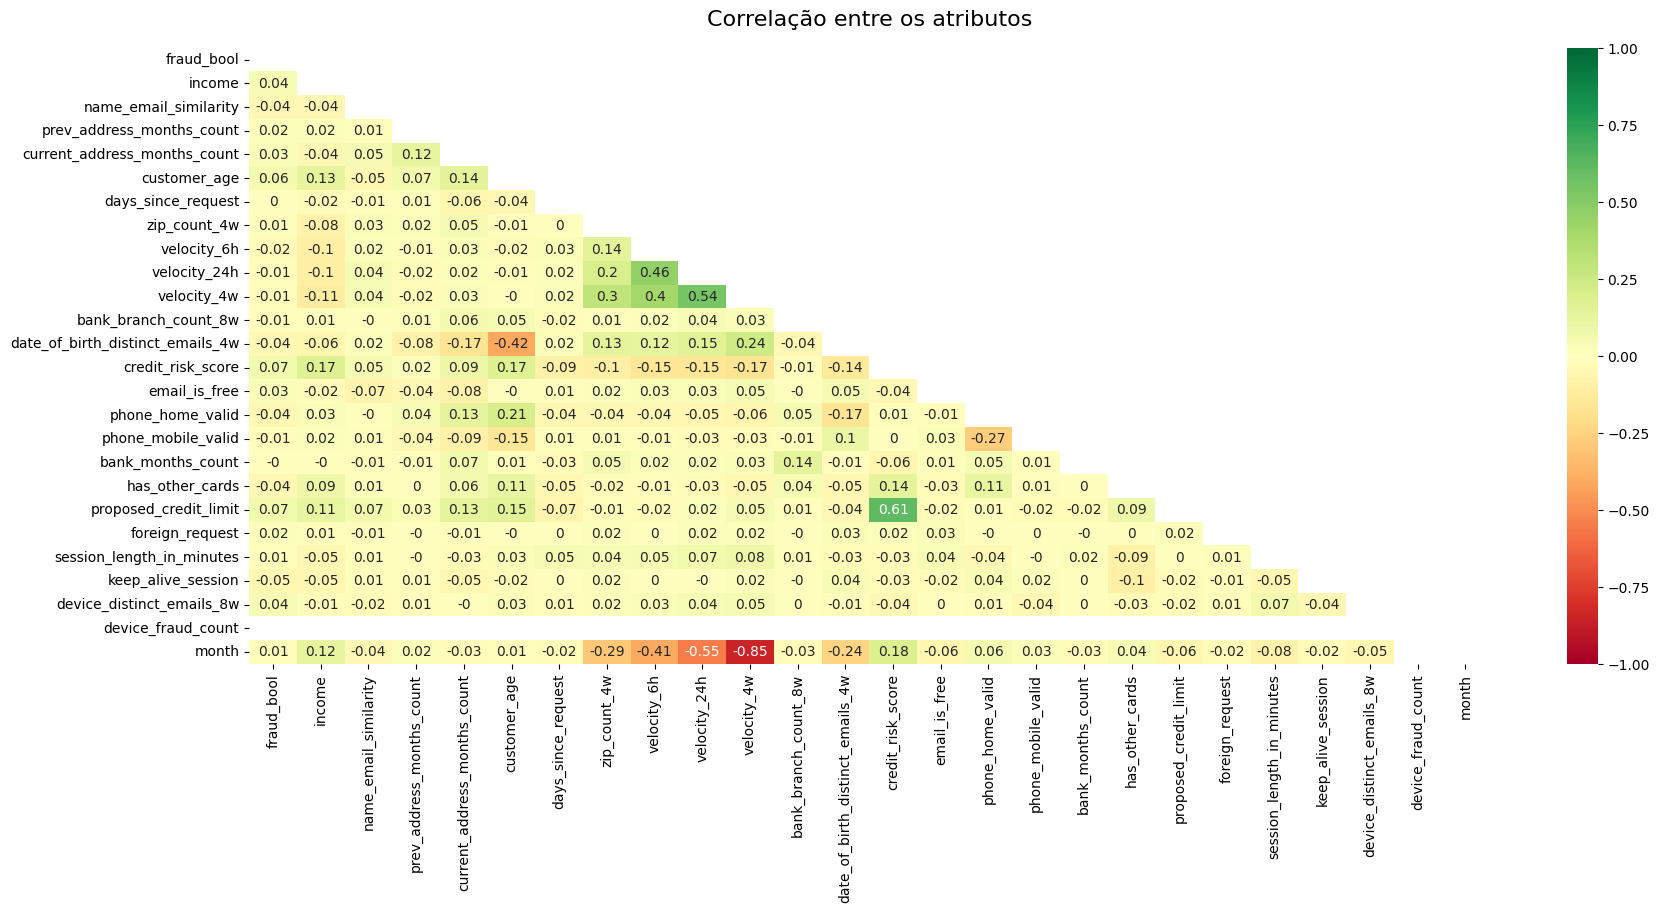

In [153]:
# Criando uma matriz de correlação com um gráfico de calor (heatmap)
plt.figure(figsize=(20, 8))  # Define o tamanho da figura do gráfico de calor

# Definindo uma máscara para ocultar a parte superior da matriz de correlação
# np.triu cria uma matriz triangular superior com 1s acima da diagonal e 0s na diagonal e abaixo
mask = np.triu(np.ones_like(df_treino[num_vars].corr(method='pearson').round(2), dtype=bool))

# Gerando o gráfico de calor (heatmap)
# df[num_vars].corr(method='pearson') calcula a matriz de correlação de Pearson entre as variáveis numéricas
# round(2) arredonda os valores da correlação para duas casas decimais
# O parâmetro mask é utilizado para ocultar a parte superior da matriz, deixando visível apenas a parte inferior (para evitar redundância)
# vmin e vmax definem os valores mínimo e máximo da escala de cores, respectivamente -1 e 1
# annot=True adiciona os valores numéricos de correlação em cada célula
# cmap="RdYlGn" define o mapa de cores, variando de vermelho para verde (indicando correlação negativa e positiva, respectivamente)
# square=False faz com que o gráfico não seja quadrado
# center=0 centraliza o gráfico de calor em torno de 0, destacando correlações negativas e positivas
heatmap = sns.heatmap(df_treino[num_vars].corr(method='pearson').round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlGn", square=False, center=0)

# Adicionando título ao gráfico
heatmap.set_title('Correlação entre os atributos', fontdict={'fontsize': 16}, pad=16)



In [155]:
df.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,month_named,target
2,0,0.8,0.996707,9.0,14.0,40,0.012316,AB,1095,4471.472149,...,0,INTERNET,22.730559,windows,0,1.0,0,0,Janeiro,0
3,0,0.6,0.475100,11.0,14.0,30,0.006991,AB,3483,14431.993621,...,0,INTERNET,15.215816,linux,1,1.0,0,0,Janeiro,0
6,0,0.2,0.773085,22.0,4.0,40,0.006919,AB,1998,11723.993606,...,0,INTERNET,28.199923,x11,1,1.0,0,0,Janeiro,0


In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9943    0.9462    0.9697    197794
           1     0.0964    0.5150    0.1624      2206

    accuracy                         0.9414    200000
   macro avg     0.5454    0.7306    0.5660    200000
weighted avg     0.9844    0.9414    0.9607    200000



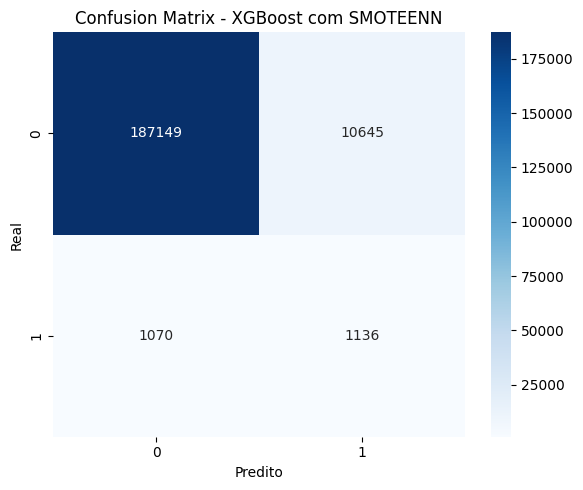

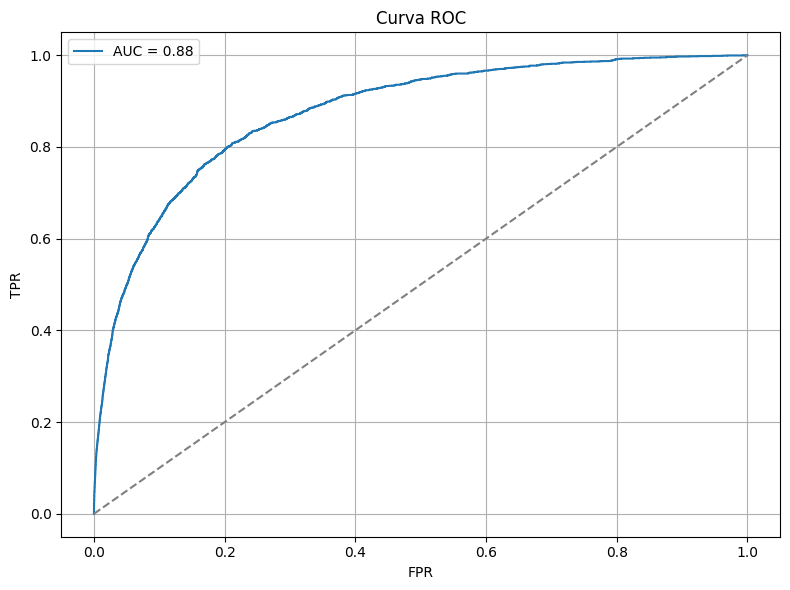

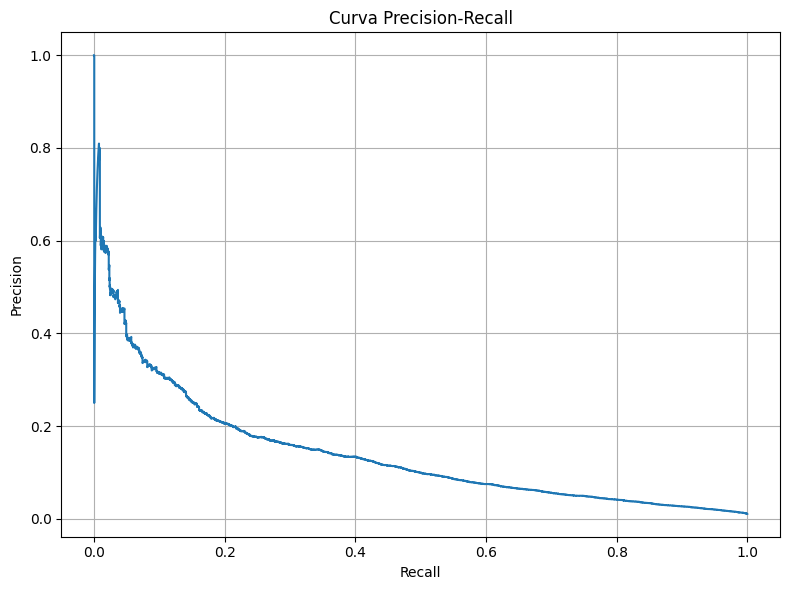

In [158]:
# ⚙️ Funções utilitárias
def carregar_dados(caminho_csv):
    return pd.read_csv(data_url)

def codificar_dados(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df

def tratar_nulos(X):
    imputer = SimpleImputer(strategy='median')
    return pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

def preparar_dados(df):
    df = df.dropna(subset=['fraud_bool'])
    X = df.drop(columns=["fraud_bool"])
    y = df["fraud_bool"]
    X = codificar_dados(X)
    X = tratar_nulos(X)
    return train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

def balancear_amostras(X_train, y_train):
    X_sampled, _, y_sampled, _ = train_test_split(
        X_train, y_train, stratify=y_train, test_size=0.8, random_state=42
    )
    smote_enn = SMOTEENN(random_state=42)
    return smote_enn.fit_resample(X_sampled, y_sampled)

def treinar_modelo(X, y):
    model = XGBClassifier(
        scale_pos_weight=10,
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    model.fit(X, y)
    return model

def avaliar_modelo(model, X_test, y_test, threshold=0.4):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba > threshold).astype(int)

    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - XGBoost com SMOTEENN")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Curva ROC")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.grid()
    plt.tight_layout()
    plt.show()

# 🚀 Execução no Colab
caminho_csv = "Base (1).csv"  # Substitua com o nome correto do seu upload no Colab
df = carregar_dados(data_url)
X_train, X_test, y_train, y_test = preparar_dados(df)
X_bal, y_bal = balancear_amostras(X_train, y_train)
modelo = treinar_modelo(X_bal, y_bal)
avaliar_modelo(modelo, X_test, y_test)
